In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
x = np.linspace(0, 1, 5)
x_range = np.linspace(0, 1, 100)

beta = 0.2
sigma_1 = 0.0
sigma_2 = 0.1
x_ref = 0.5

def mean_response(xi, x_ref, beta):
    mui = np.exp(-((x_ref - xi) ** 2 / (2 * beta ** 2)))
    return mui

def generate_responses(x, x_ref, beta, sigma, trials=1):
    responses = []
    for _ in range(trials):
        mu = mean_response(x, x_ref, beta)
        s = np.random.normal(mu, sigma)
        responses.append(s)
    return np.array(responses)

def plot_responses(responses, title, ax):
    for s in responses:
        ax.plot(range(1, 6), s, marker='o', linestyle='-', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("responses $s_i$")
    ax.grid(True)

def likelihood(x, x_range, s, beta, sigma):
    likelihoods = []
    for xi in x_range:
        mu = mean_response(x, xi, beta)
        likelihood = np.exp(-np.sum((s - mu) ** 2) / (2 * sigma ** 2))
        likelihoods.append(likelihood)
    return np.array(likelihoods)

/var/folders/0j/zztfp_1n4w1b9d_w0flhk0mm0000gn/T/ipykernel_60611/1687929647.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  likelihood = np.exp(-np.sum((s - mu) ** 2) / (2 * sigma ** 2))


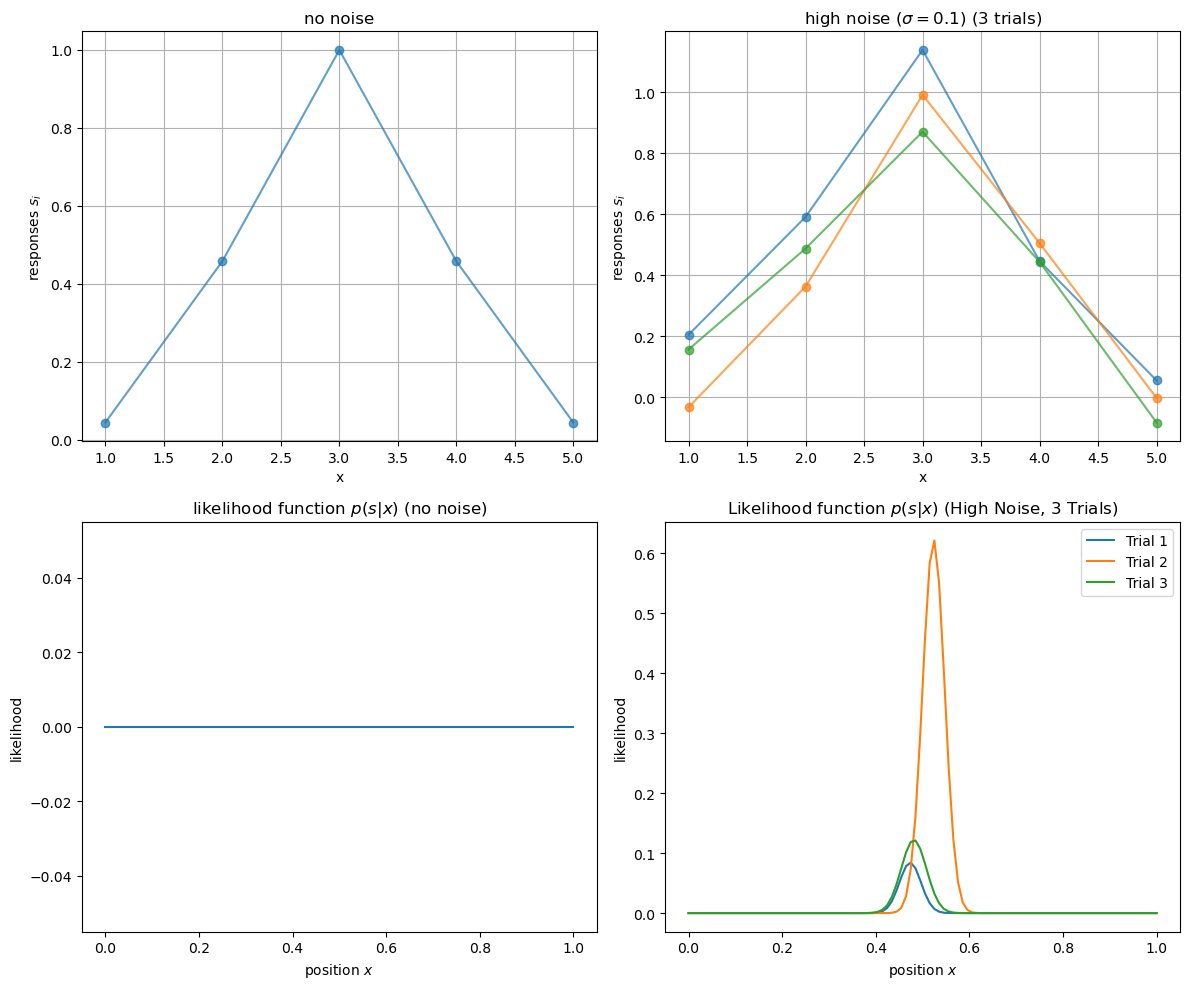

In [47]:
s_1 = generate_responses(x, x_ref, beta, sigma_1)
s_2 = generate_responses(x, x_ref, beta, sigma_2, 3)

likelihood_1 = likelihood(x, x_range, s_1, beta, sigma_1)
likelihood_2 = []
for i, s_trail in enumerate(s_2):
    likelihood_2.append(likelihood(x, x_range, s_trail, beta, sigma_2))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plot_responses(s_1, r"no noise", axs[0, 0])
plot_responses(s_2, r"high noise ($\sigma=0.1$) (3 trials)", axs[0, 1])

axs[1, 0].plot(x_range, likelihood_1)
axs[1, 0].set_title(r"likelihood function $p(s | x)$ (no noise)")
axs[1, 0].set_xlabel("position $x$")
axs[1, 0].set_ylabel("likelihood")

for i, likelihood_trial in enumerate(likelihood_2):
    axs[1, 1].plot(x_range, likelihood_trial, label=f'Trial {i + 1}')

axs[1, 1].set_title(r"Likelihood function $p(s | x)$ (High Noise, 3 Trials)")
axs[1, 1].set_xlabel("position $x$")
axs[1, 1].set_ylabel("likelihood")
axs[1, 1].legend()

plt.tight_layout()
plt.show()